In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
networks = ['polblogs_beta1p25_00',            'cintestinalis_beta2p00_00',      'foodweb_little_rock_beta1p50_00', 'fao_trade_beta1p75_00',                   'advogato_00',
            'email_company_beta1p50_00',       'sp_high_school_diaries_00',      'us_agencies_washington_00',       'residence_hall_00',                       'celegansneural_00',
            'uni_email_beta1p45_00',           'add_health_comm50_beta1p40_00',  'messal_shale_00',                 'ecoli_transcription_v1_0_beta1p50_00',    'copenhagen_calls_beta1p50_00',
            'us_agencies_vermont_beta2p00_00', 'physician_trust_00',             'un_migrations_beta4p50_00',       'yeast_transcription_beta1p20_00',         'faa_routes_00',
            'copenhagen_sms_beta1p30_00',      'interactome_figeys_beta1p01_00', 'openflights_beta3p25_00',         'celegans_2019_male_chemical_beta2p00_00', 'chess_beta1p30_00']
labels = ['Fig. 4(d)', 'Fig. 4(e)', 'Fig. 4(f)', 'Fig. 4(g)', 'Fig. 4(h)', 'Fig. 4(i)', 'Fig. 4(j)', 'Fig. 4(k)', 'Fig. 4(l)',
          'Fig. S2(a)', 'Fig. S2(b)', 'Fig. S2(c)', 'Fig. S2(d)', 'Fig. S2(e)', 'Fig. S2(f)', 'Fig. S2(g)', 'Fig. S2(h)', 'Fig. S2(i)', 'Fig. S2(j)', 'Fig. S2(k)', 'Fig. S2(l)', 'Fig. S2(m)', 'Fig. S2(n)', 'Fig. S2(o)', 'Fig. S2(p)']
names = ['political blogs', 'tadpole larva brain (C. intestinalis)', 'Little Rock Lake food web', 'FAO trade network', 'Advogato trust network', 'manufacturing company email', 'primary school contacts', 'U.S. government agency websites', 'friendship network',
         'C. elegans connectome', 'email network (Uni. R-V, Spain)', 'frienship network 2', 'Messel Shale food web', 'E. coli transcription network', 'Copenhagen networks study (calls)', 'U.S. government agency websites (VT)', 'physician trust network', 'UN migration stock', 'yeast transcription network', 'FAA preferred routes', 'Copenhagen networks study (sms)', 'Figeys human interactome', 'Openflights airport network', 'C. elegans neurons (male, chemical)', 'chess matches']

In [3]:
filename = '../../directedS1_data/real_networks/network_properties/all_gprop.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

markers = cycle(('X', '^', 'D', 'H', 'o', 'p', '>', 'h', 'P', 'v', 's', '<'))
colorMap = dict(zip(networks, sns.color_palette('deep', int(len(networks)))))
markerMap = dict(zip(networks, markers))

recip_real = {network: [] for network in networks}
clust_real = {network: [] for network in networks}
nbtri_real = {network: [] for network in networks}

recip_synth = {network: [] for network in networks}
clust_synth = {network: [] for network in networks}
nbtri_synth = {network: [] for network in networks}

for network in networks:
    
    networkName = network.split('_00')[0].split('_beta')[0]
    
    filename = '../../directedS1_data/synthetic_networks/network_properties/' + network + '_gprop.txt'
    header = open(filename, 'r').readline().replace('#', ' ').split()
    synth_prop = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)
    # print(network, len(synth_prop))

    recip_synth[network].extend(synth_prop['reciprocity_ratio'])
    clust_synth[network].extend(synth_prop['avg_undir_loc_clust'])
    nbtri_synth[network].extend(synth_prop['nb_triangles'])

    recip_real[network].append(float(df.loc[networkName]['reciprocity_ratio']))
    clust_real[network].append(float(df.loc[networkName]['avg_undir_loc_clust']))
    nbtri_real[network].append(int(df.loc[networkName]['nb_triangles']))

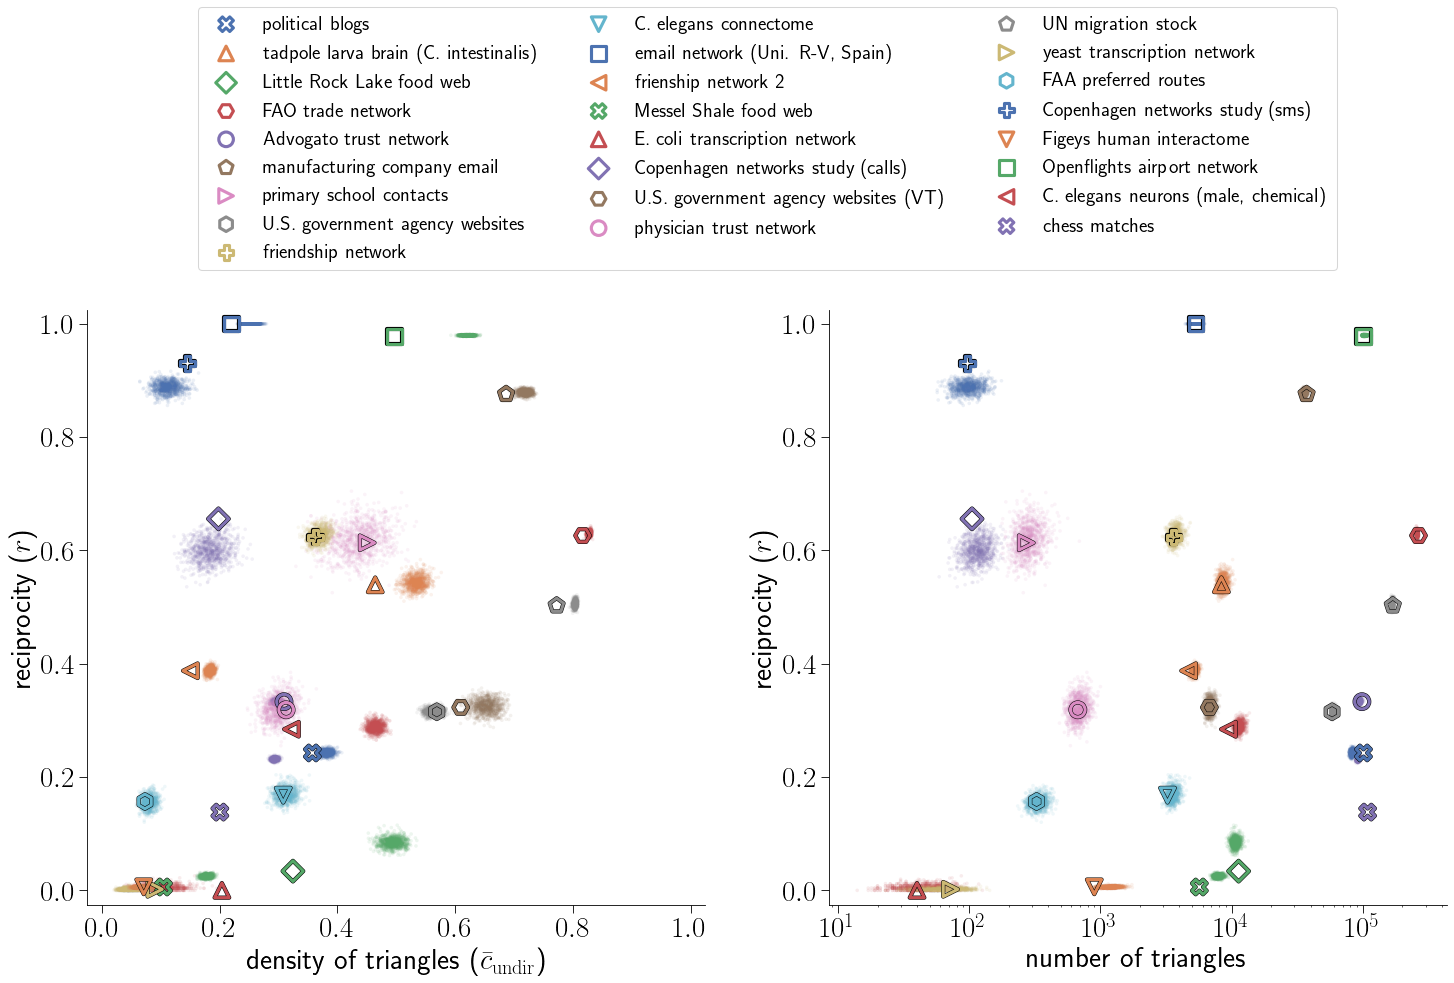

In [4]:
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'
plt.rcParams["font.size"] = 28
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams["font.weight"] = 'light'

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(23.4, 10.3), dpi=75)

for network in networks:
    ax[0].scatter(clust_synth[network], recip_synth[network], facecolor=colorMap[network], edgecolor='None', s=12, marker='o', linewidth=2, alpha=0.1)
    ax[1].scatter(nbtri_synth[network], recip_synth[network], facecolor=colorMap[network], edgecolor='None', s=12, marker='o', linewidth=2, alpha=0.1)

for network, name in zip(networks, names):
    ax[0].scatter(clust_real[network], recip_real[network], facecolor='None', edgecolor='black',           s=196, marker=markerMap[network], linewidth=4)
    ax[0].scatter(clust_real[network], recip_real[network], facecolor='None', edgecolor=colorMap[network], s=196, marker=markerMap[network], linewidth=3, label=name)
    ax[1].scatter(nbtri_real[network], recip_real[network], facecolor='None', edgecolor='black',           s=196, marker=markerMap[network], linewidth=4)
    ax[1].scatter(nbtri_real[network], recip_real[network], facecolor='None', edgecolor=colorMap[network], s=196, marker=markerMap[network], linewidth=3)

ax[0].set_xlabel(r'density of triangles ($\bar{c}_\mathrm{undir}$)')
ax[0].set_ylabel(r'reciprocity ($r$)')
ax[1].set_xlabel(r'number of triangles')
ax[1].set_ylabel(r'reciprocity ($r$)')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xscale('log')

ax[0].set_xlim(left=-0.025, right=1.025)
ax[0].set_ylim(bottom=-0.025, top=1.025)
ax[1].set_ylim(bottom=-0.025, top=1.025)

ax[0].tick_params(length=8)
ax[1].tick_params(length=8)

ax[0].legend(loc='lower center', frameon=True, fontsize='x-small', bbox_to_anchor=(1.1, 1.05), ncol=3)

#fig.tight_layout()
fig.savefig("../figures/pdf/figure_paper_synthetic_networks_reciprocity_vs_clustering_networks.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_synthetic_networks_reciprocity_vs_clustering_networks.svg", bbox_inches='tight')

In [5]:
filename = '../../directedS1_data/real_networks/network_properties/all_gprop.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

filename = '../../directedS1_data/real_networks/network_properties/graph_properties.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
netzschleuderDF = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

validCategories = ['Economic', 'Transportation', 'Technological', 'Informational', 'Biological', 'Social']
markers = cycle(('X', '^', 'D', 'H', 'o', 'p', 'h', 'P', 'v', 's'))
colorMap = dict(zip(validCategories, sns.color_palette('deep', int(len(validCategories)))))
markerMap = dict(zip(validCategories, markers))

recip_real = {cat: [] for cat in validCategories}
clust_real = {cat: [] for cat in validCategories}
nbtri_real = {cat: [] for cat in validCategories}

recip_synth = {cat: [] for cat in validCategories}
clust_synth = {cat: [] for cat in validCategories}
nbtri_synth = {cat: [] for cat in validCategories}

for network in networks:
    
    networkName = network.split('_00')[0].split('_beta')[0]
    
    if 'add_health' in networkName:
        cat = ['Social']
    else:
        if 'freshman_t' in networkName:
            cat = [tag for tag in netzschleuderDF.loc[networkName.replace('man', 'men')]['tags'].split(',') if tag in validCategories]
        else:
            cat = [tag for tag in netzschleuderDF.loc[networkName]['tags'].split(',') if tag in validCategories]
    if len(cat) == 0:
        cat = 'other'
        print(networkName + ' does not have a category')
    else:
        cat = cat[0]

    filename = '../../directedS1_data/synthetic_networks/network_properties/' + network + '_gprop.txt'
    header = open(filename, 'r').readline().replace('#', ' ').split()
    synth_prop = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

    recip_synth[cat].extend(synth_prop['reciprocity_ratio'])
    clust_synth[cat].extend(synth_prop['avg_undir_loc_clust'])
    nbtri_synth[cat].extend(synth_prop['nb_triangles'])

    recip_real[cat].append(df.loc[networkName]['reciprocity_ratio'])
    clust_real[cat].append(df.loc[networkName]['avg_undir_loc_clust'])
    nbtri_real[cat].append(df.loc[networkName]['nb_triangles'])
    
labels = {'Biological': 'biol.',
          'Economic': 'econ.',
          'Informational': 'inform.',
          'Social': 'social',
          'Technological': 'techo.',
          'Transportation': 'transp.'}

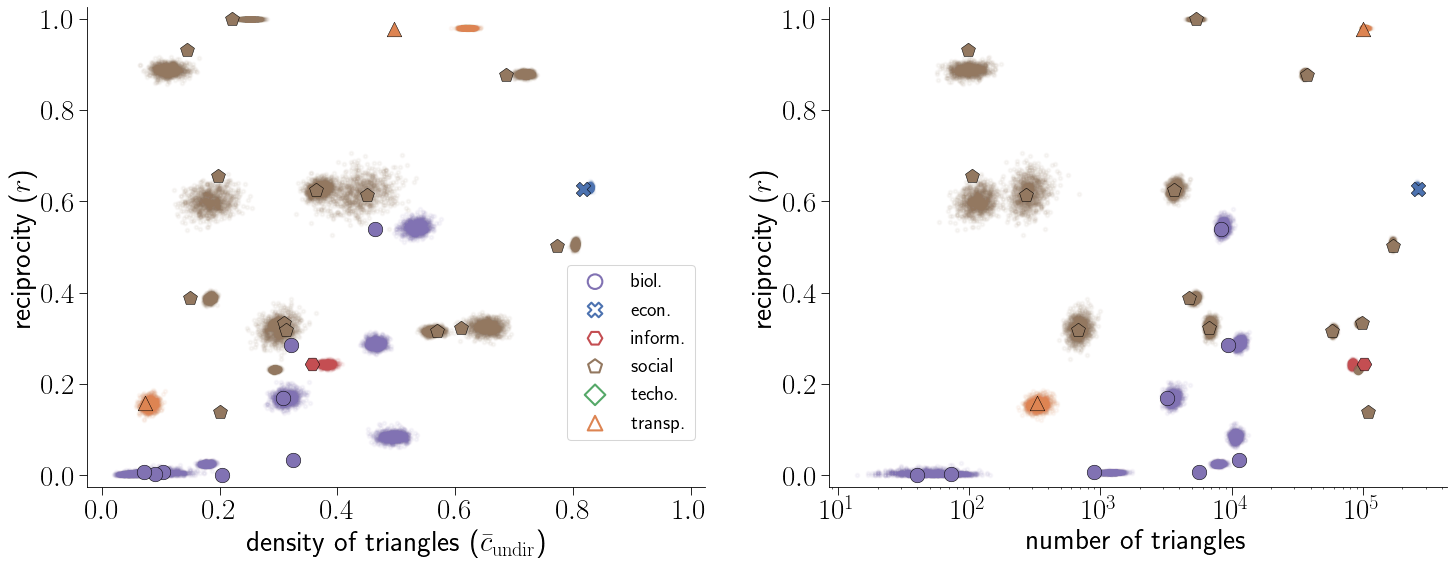

In [6]:
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'
plt.rcParams["font.size"] = 28
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams["font.weight"] = 'light'

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(23.4, 8.3), dpi=75)

for cat in validCategories:
    ax[0].scatter(clust_synth[cat], recip_synth[cat], facecolor=colorMap[cat], s=12, marker='o', linewidth=2, alpha=0.05)
    ax[1].scatter(nbtri_synth[cat], recip_synth[cat], facecolor=colorMap[cat], s=12, marker='o', linewidth=2, alpha=0.05)

for cat in validCategories:
    ax[0].scatter(clust_real[cat], recip_real[cat], edgecolor='black', facecolor=colorMap[cat], s=196, marker=markerMap[cat], linewidth=0.5)
    ax[1].scatter(nbtri_real[cat], recip_real[cat], edgecolor='black', facecolor=colorMap[cat], s=196, marker=markerMap[cat], linewidth=0.5)

for cat in sorted(validCategories):
    ax[0].scatter(np.NaN, np.NaN, facecolor='None', edgecolor=colorMap[cat], s=196, marker=markerMap[cat], linewidth=2, label=labels[cat])

ax[0].set_xlabel(r'density of triangles ($\bar{c}_\mathrm{undir}$)')
ax[0].set_ylabel(r'reciprocity ($r$)')
ax[1].set_xlabel(r'number of triangles')
ax[1].set_ylabel(r'reciprocity ($r$)')

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xscale('log')

ax[0].set_xlim(left=-0.025, right=1.025)
ax[0].set_ylim(bottom=-0.025, top=1.025)
ax[1].set_ylim(bottom=-0.025, top=1.025)

ax[0].tick_params(length=8)
ax[1].tick_params(length=8)

ax[0].legend(loc='lower right', frameon=True, fontsize='x-small', bbox_to_anchor=(1.0, 0.075))

fig.savefig("../figures/pdf/figure_paper_synthetic_networks_reciprocity_vs_clustering_categories.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_paper_synthetic_networks_reciprocity_vs_clustering_categories.svg", bbox_inches='tight')